# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\gogol\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gogol\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


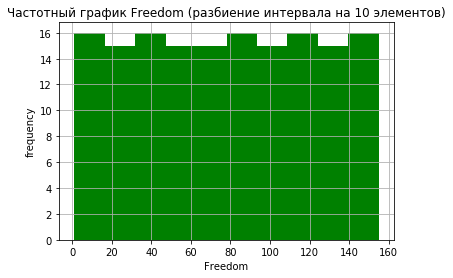

In [4]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала на 10 элементов)')
plt.grid(True)
plt.show()

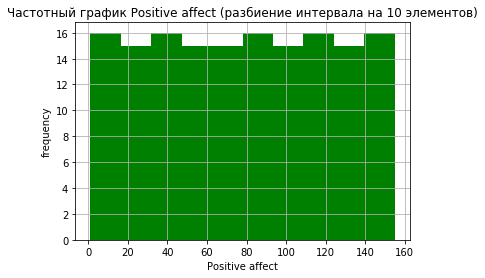

In [5]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала на 10 элементов)')
plt.grid(True)
plt.show()

**При делении 155 на 10 мы получаем нецелое число, из-за чего распределение не является визуально идеально равномерным.  
Сделаем небольшую хитрость. Поскольку 155/5 = 31, возьмем 31 в качестве bins и получим полностью равномерное распределение.**

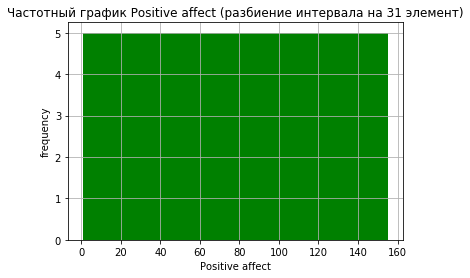

In [6]:
n, bins, patches = plt.hist(df['Positive affect'], 31, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала на 31 элемент)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [7]:
# Медиана

print('Медиана:', statistics.median(df.Freedom))

Медиана: 71.0


Почему нельзя найти моду?

In [8]:
# Мода

# print('Значение моды:', statistics.mode(df.Freedom))
# Моду нельзя найти, поскольку все значения повторяются одинаковое количество раз - 1.

In [9]:
# Математическое ожидание

# Этот метод не учитывает ячейки с NaN
print('Математическое ожидание:', df.Freedom.mean())

# Можно все ячейки NaN заменить на среднее значание по столбцу Freedom и запустить statistics.mean()
print('Математическое ожидание:', statistics.mean(df.Freedom.fillna(df.Freedom.mean())))

# Можно все ячейки NaN заменить на 0 и запустить statistics.mean()
print('Математическое ожидание:', statistics.mean(df.Freedom.fillna(0)))

Математическое ожидание: 78.0
Математическое ожидание: 78.0
Математическое ожидание: 77.5


In [10]:
# Стандартное отклонение (standard deviation)

# Просто так не работает из-за пустых ячеек NaN
# statistics.pstdev(df.Freedom)

# Заменяем ячейки NaN на среднее значание по столбцу Freedom и запускаем statistics.pstdev()
print('Стандартное отклонение:', statistics.pstdev(df.Freedom.fillna(df.Freedom.mean())))

Стандартное отклонение: 44.60007473835292


In [11]:
# Дисперсия (variance)

# Просто так не работает из-за пустых ячеек NaN
# statistics.pvariance(df.Freedom)

# Заменяем ячейки NaN на среднее значание по столбцу Freedom и запускаем statistics.pvariance()
print('Дисперсия:', statistics.pvariance(df.Freedom.fillna(df.Freedom.mean())))

Дисперсия: 1989.1666666666667


In [12]:
# Минимум и максимум

print('Минимум:', min(df.Freedom))
print('Максимум:', max(df.Freedom))

Минимум: 1.0
Максимум: 155.0


In [13]:
# Выбросы

# Количество отсутствующих значений (NaN)
print('Количество отсутвующих значений (NaN):', df.Freedom.isnull().sum())

Количество отсутвующих значений (NaN): 1


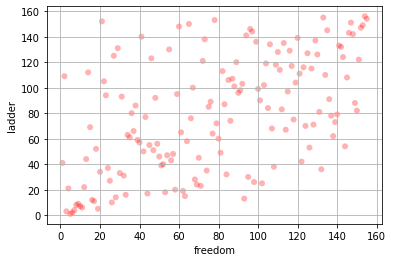

In [14]:
fig, ax = plt.subplots()
ax.scatter(df.Freedom, df.Ladder, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('ladder')
plt.show()

In [15]:
# По графику видно, что выбросов нет.

In [16]:
# Размах

print('Размах:', max(df.Freedom) - min(df.Freedom))

Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


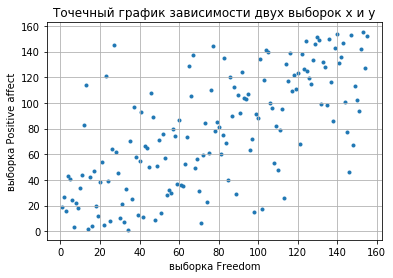

In [17]:
# Графическая корреляция

plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')

# Коэффициент корреляции Пирсона

from scipy.stats import pearsonr
x = df['Freedom'].fillna(df.Freedom.mean())
y = df['Positive affect'].fillna(df.Freedom.mean())

corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

In [18]:
# По графику можно заметить, что между х и у есть прямая корреляция, т.е. положительная.
# Знак "+" коэффициента Пирсона также свидетельствует о положительной (прямой) корреляции.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [19]:
# Операция центрирования

freedom_norm = df.Freedom.fillna(df.Freedom.mean())
print(statistics.mean(freedom_norm))

freedom_norm_center = freedom_norm - statistics.mean(freedom_norm)
print(statistics.mean(freedom_norm_center))

78.0
0.0


In [20]:
# Среднее значение равно 0, значит, нормализовали правильно.

In [21]:
print(min(freedom_norm_center))
print(max(freedom_norm_center))

-77.0
77.0


In [22]:
# Операция масштабирования

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm_center_scale = min_max_scaler.fit_transform(np.array(freedom_norm_center).reshape(-1, 1))
print(min(freedom_norm_center_scale))
print(max(freedom_norm_center_scale))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

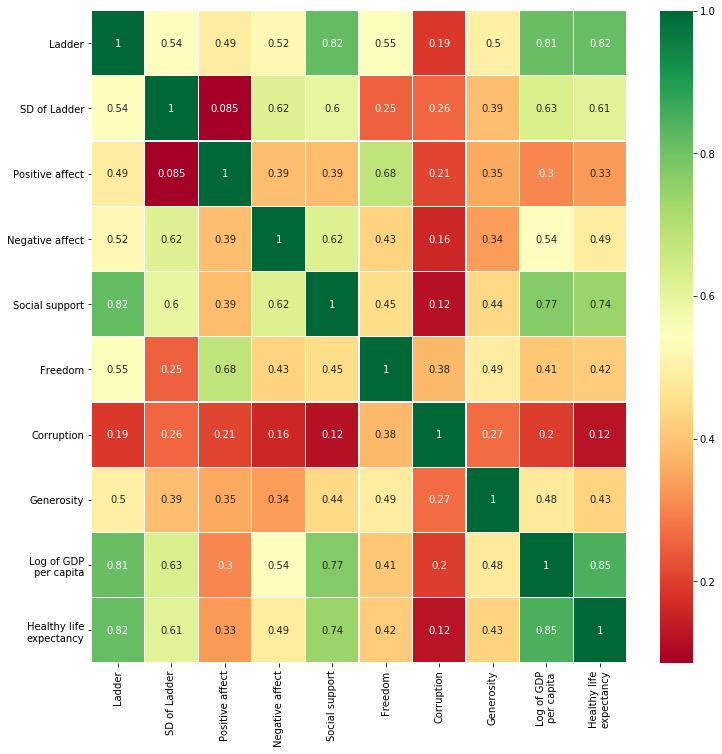

In [23]:
# Строим матрицу корреляций

import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [24]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

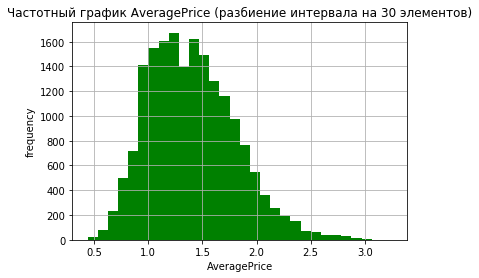

In [25]:
n, bins, patches = plt.hist(df['AveragePrice'], 30, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала на 30 элементов)')
plt.grid(True)
plt.show()

In [26]:
# Мы получили нормальное распределение.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если коррелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878848


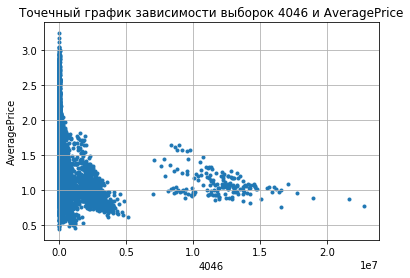

In [27]:
# Корреляция между 4046 и AveragePrice

# Графическая корреляция

plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.title('Точечный график зависимости выборок 4046 и AveragePrice')
plt.grid(True)
plt.scatter(df['4046'], df['AveragePrice'], marker='.')

# Коэффициент корреляции Пирсона

from scipy.stats import pearsonr
x = df['4046'].fillna(df['4046'].mean())
y = df['AveragePrice'].fillna(df['AveragePrice'].mean())

corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.1729277725093354


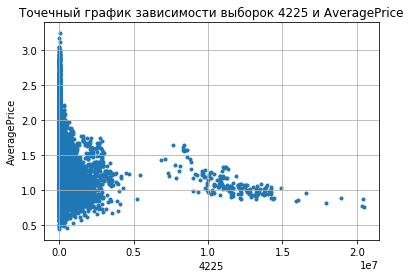

In [28]:
# Корреляция между 4225 и AveragePrice

# Графическая корреляция

plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.title('Точечный график зависимости выборок 4225 и AveragePrice')
plt.grid(True)
plt.scatter(df['4225'], df['AveragePrice'], marker='.')

# Коэффициент корреляции Пирсона

from scipy.stats import pearsonr
x = df['4225'].fillna(df['4225'].mean())
y = df['AveragePrice'].fillna(df['AveragePrice'].mean())

corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17944598397975622


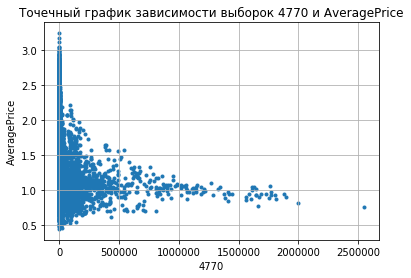

In [29]:
# Корреляция между 4770 и AveragePrice

# Графическая корреляция

plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.title('Точечный график зависимости выборок 4770 и AveragePrice')
plt.grid(True)
plt.scatter(df['4770'], df['AveragePrice'], marker='.')

# Коэффициент корреляции Пирсона

from scipy.stats import pearsonr
x = df['4770'].fillna(df['4770'].mean())
y = df['AveragePrice'].fillna(df['AveragePrice'].mean())

corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)

In [30]:
# На всех графиках прослеживается небольшая обратная корреляция.
# Это может говорить о том, что "оптом" продают дешевле.